In [ ]:
'''
 * Copyright (c) 2005 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Objectives

We initiated our discussion of performance optimization in Chapter 8. There we introduced the Taylor series expansion as a tool for analyzing the performance surface, and then used it to determine conditions that must be satisfied by optimum points. In this chapter, we will again use the Taylor series expansion, in this case to develop algorithms to locate the optimum points.

We will discuss three different categories of optimization algorithms:

1. **Steepest Descent**
2. **Newton's Method**
3. **Conjugate Gradient**

In Chapters 10–14, we will apply all of these algorithms to the training of neural networks.


## Theory and Examples

In the previous chapter, we began our investigation of performance surfaces. Now we are in a position to develop algorithms to search the parameter space and locate minimum points of the surface (find the optimum weights and biases for a given neural network). 

It is interesting to note that most of the algorithms presented in this chapter were developed hundreds of years ago. The basic principles of optimization were discovered during the 17th century, by such scientists and mathematicians as Kepler, Fermat, Newton, and Leibniz. From 1950 on, these principles were rediscovered to be implemented on “high speed” (in comparison to the pen and paper available to Newton) digital computers. The success of these efforts stimulated significant research on new algorithms, and the field of optimization theory became recognized as a major branch of mathematics. 

Now neural network researchers have access to a vast storehouse of optimization theory and practice that can be applied to the training of neural networks. 

The objective of this chapter, then, is to develop algorithms to optimize a performance index $ F(x) $. For our purposes, the word “optimize” will mean to find the value of $ x $ that minimizes $ F(x) $. 

All of the optimization algorithms we will discuss are iterative. We begin from some initial guess, $ x_0 $, and then update our guess in stages according to an equation of the form:

$$
x_{k + 1} = x_k + \alpha_k p_k, \tag{9.1}
$$

or 

$$
\Delta x_k = (x_{k + 1} - x_k) = \alpha_k p_k. \tag{9.2}
$$

Where the vector $ p_k $ represents a search direction, and the positive scalar $ \alpha_k $ is the learning rate, which determines the length of the step. 

The algorithms we will discuss in this chapter are distinguished by the choice of the search direction, $ p_k $. We will discuss three different possibilities. There are also a variety of ways to select the learning rate, $ \alpha_k $, and we will discuss several of these. 

## Steepest Descent

When we update our guess of the optimum (minimum) point using Eq. (9.1), we would like to have the function decrease at each iteration. In other words, 

$$
F(x_{k + 1}) < F(x_k). \tag{9.3}
$$


## Steepest Descent

How can we choose a direction $ p_k $, so that for a sufficiently small learning rate $ \alpha_k $, we will move "downhill" in this way? Consider the first-order Taylor series expansion (see Eq. (8.9)) of $ F(x) $ about the old guess $ x_k $:

$$
F(x_{k+1}) = F(x_k + \Delta x_k) \approx F(x_k) + g_k^T \Delta x_k, \tag{9.4}
$$

where $ g_k $ is the gradient evaluated at the old guess $ x_k $:

$$
g_k \equiv \nabla F(x) \Big|_{x = x_k}. \tag{9.5}
$$

For $ F(x_{k+1}) $ to be less than $ F(x_k) $, the second term on the right-hand side of Eq. (9.4) must be negative:

$$
g_k^T \Delta x_k = \alpha_k g_k^T p_k < 0. \tag{9.6}
$$

We will select an $ \alpha_k $ that is small but greater than zero. This implies:

$$
g_k^T p_k < 0. \tag{9.7}
$$

Any vector $ p_k $ that satisfies this equation is called a descent direction. The function must go down if we take a small enough step in this direction. 

This brings up another question: What is the direction of steepest descent? In what direction will the function decrease most rapidly? This will occur when

$$
g_k^T p_k \tag{9.8}
$$

is most negative. This is an inner product between the gradient and the direction vector. It will be most negative when the direction vector is the negative of the gradient. Therefore, a vector that points in the steepest descent direction is:

$$
p_k = -g_k. \tag{9.9}
$$

Using this in the iteration of Eq. (9.1) produces the method of steepest descent:

$$
x_{k+1} = x_k - \alpha_k g_k. \tag{9.10}
$$

For steepest descent, there are two general methods for determining the learning rate $ \alpha_k $. One approach is to minimize the performance index $ F(x) $ with respect to $ \alpha_k $ at each iteration. In this case, we are minimizing along the line $ x_k - \alpha_k g_k $:

$$
x_k - \alpha_k g_k. \tag{9.11}
$$

The other method for selecting $ \alpha_k $ is to use a fixed value (e.g., $ \alpha_k = 0.02 $), or to use variable, but predetermined, values (e.g., $ \alpha_k = \frac{1}{k} $).

## Example: Applying the Steepest Descent Algorithm

Let’s apply the steepest descent algorithm to the following function:

$$
F(x) = x_1^2 + 25x_2^2, \tag{9.12}
$$

starting from the initial guess:

$$
x_0 = \begin{pmatrix} 0.5 \\ 0.5 \end{pmatrix}. \tag{9.13}
$$

The first step is to find the gradient:

$$
\nabla F(x) = \begin{pmatrix} \frac{\partial F}{\partial x_1} \\ \frac{\partial F}{\partial x_2} \end{pmatrix} = \begin{pmatrix} 2x_1 \\ 50x_2 \end{pmatrix}. \tag{9.14}
$$

If we evaluate the gradient at the initial guess, we find:

$$
g_0 = \nabla F(x) \Big|_{x = x_0} = \begin{pmatrix} 1 \\ 25 \end{pmatrix}. \tag{9.15}
$$

Assume that we use a fixed learning rate of $ \alpha = 0.01 $. The first iteration of the steepest descent algorithm would be:

$$
x_1 = x_0 - \alpha g_0 = \begin{pmatrix} 0.5 \\ 0.5 \end{pmatrix} - 0.01 \begin{pmatrix} 1 \\ 25 \end{pmatrix} = \begin{pmatrix} 0.49 \\ 0.25 \end{pmatrix}. \tag{9.16}
$$

The second iteration of steepest descent produces:

$$
x_2 = x_1 - \alpha g_1 = \begin{pmatrix} 0.49 \\ 0.25 \end{pmatrix} - 0.01 \begin{pmatrix} 0.98 \\ 12.5 \end{pmatrix} = \begin{pmatrix} 0.4802 \\ 0.125 \end{pmatrix}. \tag{9.17}
$$

If we continue the iterations, we obtain the trajectory illustrated in Figure.1.


## Steepest Descent Trajectories with Different Learning Rates

In Figure.1, we illustrate the trajectory for the steepest descent algorithm with a learning rate of $ \alpha = 0.01 $.

$$
\begin{pmatrix}
1 & 0.5 & 0 & -0.5 & -1 \\
-1 & -0.5 & 0 & 0.5 & 1
\end{pmatrix}
$$

**Figure.1: Trajectory for Steepest Descent with $ \alpha = 0.01 $**

Note that the steepest descent trajectory, for a small learning rate, follows a path that is always orthogonal to the contour lines. This is because the gradient is orthogonal to the contour lines.

## Effect of Learning Rate on Performance

How would a change in the learning rate affect the performance of the algorithm?

If we increase the learning rate to $ \alpha = 0.035 $, we obtain the trajectory illustrated in Figure 9.2.

$$
\begin{pmatrix}
1 & 0.5 & 0 & -0.5 & -1 \\
-1 & -0.5 & 0 & 0.5 & 1
\end{pmatrix}
$$

**Figure.2: Trajectory for Steepest Descent with $ \alpha = 0.035 $**

Note that the trajectory now oscillates. If we make the learning rate too large, the algorithm will become unstable; the oscillations will increase instead of decaying.

We would like to make the learning rate large, as this would allow us to take larger steps and expect to converge faster. However, as seen in this example, if we make the learning rate too large, the algorithm will become unstable.

## Predicting Maximum Allowable Learning Rate

Is there some way to predict the maximum allowable learning rate? 

This is not possible for arbitrary functions, but for quadratic functions, we can set an upper limit.


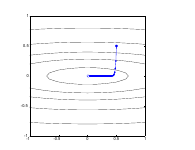

Figure.1 Trajectory for Steepest Descent with  = 0.01

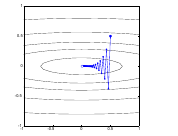

Figure.2 Trajectory for Steepest Descent with  = 0.035


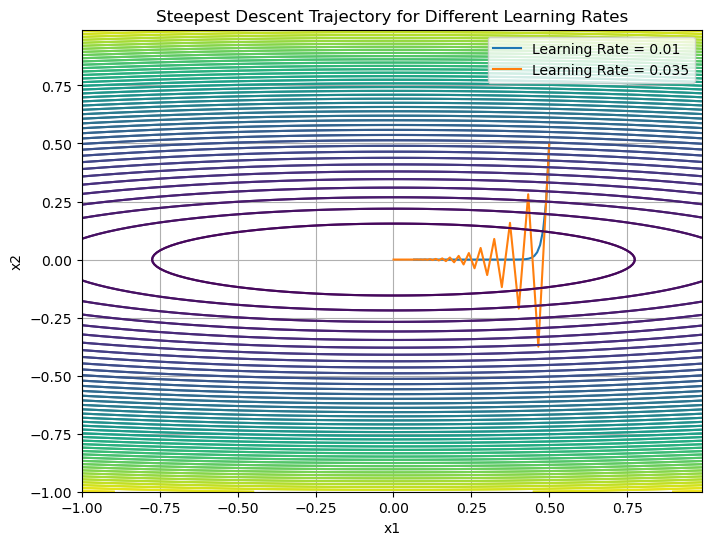

In [2]:
import matplotlib.pyplot as plt
import numpy as np
# Define the quadratic function F(x1, x2) = x1^2 + 25 * x2^2
def F(x1, x2):
    return x1**2 + 25 * x2**2

# Gradient of the function ∇F(x1, x2)
def gradient_F(x1, x2):
    dF_dx1 = 2 * x1
    dF_dx2 = 50 * x2
    return dF_dx1, dF_dx2

# Steepest descent algorithm
def steepest_descent(x0, y0, learning_rate, iterations):
    x_vals = [x0]
    y_vals = [y0]
    
    for i in range(iterations):
        grad_x, grad_y = gradient_F(x0, y0)
        
        # Update the points using gradient descent
        x0 = x0 - learning_rate * grad_x
        y0 = y0 - learning_rate * grad_y
        
        x_vals.append(x0)
        y_vals.append(y0)
    
    return x_vals, y_vals

# Initial point
x0, y0 = 0.5, 0.5

# Learning rates to test
learning_rates = [0.01, 0.035]
iterations = 100

# Plot setup
plt.figure(figsize=(8, 6))

for lr in learning_rates:
    x_vals, y_vals = steepest_descent(x0, y0, lr, iterations)
    
    # Plot the trajectory of steepest descent
    plt.plot(x_vals, y_vals, label=f'Learning Rate = {lr}')
    
    # Plot the contour lines of the function
    x = y = [i/100 for i in range(-100, 100)]
    X, Y = np.meshgrid(x, y)
    Z = F(X, Y)
    plt.contour(X, Y, Z, levels=50)

plt.title('Steepest Descent Trajectory for Different Learning Rates')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.show()


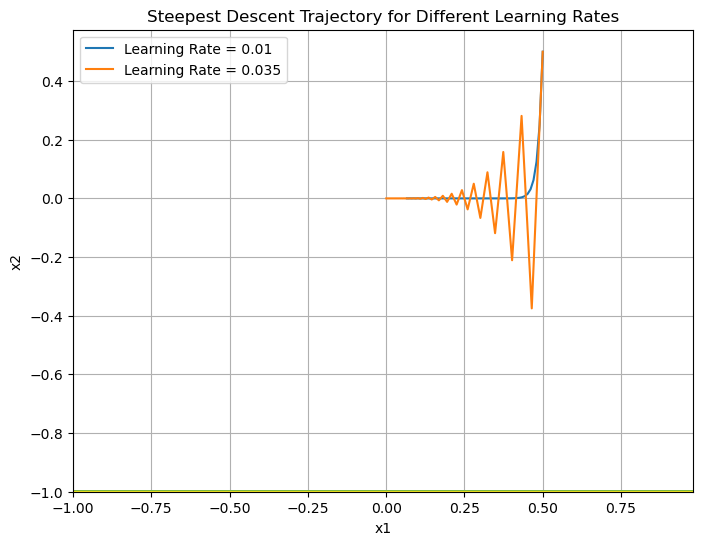

In [5]:
import matplotlib.pyplot as plt

# Define the quadratic function F(x1, x2) = x1^2 + 25 * x2^2
def F(x1, x2):
    return x1**2 + 25 * x2**2

# Gradient of the function ∇F(x1, x2)
def gradient_F(x1, x2):
    dF_dx1 = 2 * x1
    dF_dx2 = 50 * x2
    return dF_dx1, dF_dx2

# Steepest descent algorithm
def steepest_descent(x0, y0, learning_rate, iterations):
    x_vals = [x0]
    y_vals = [y0]
    
    for i in range(iterations):
        grad_x, grad_y = gradient_F(x0, y0)
        
        # Update the points using gradient descent
        x0 = x0 - learning_rate * grad_x
        y0 = y0 - learning_rate * grad_y
        
        x_vals.append(x0)
        y_vals.append(y0)
    
    return x_vals, y_vals

# Function to create mesh grid without NumPy (for contour plot)
def create_meshgrid(x_min, x_max, y_min, y_max, steps):
    x_vals = [(x_min + i * (x_max - x_min) / steps) for i in range(steps)]
    y_vals = [(y_min + i * (y_max - y_min) / steps) for i in range(steps)]
    
    X, Y = [], []
    Z = []
    
    for x in x_vals:
        X_row = []
        Y_row = []
        Z_row = []
        for y in y_vals:
            X_row.append(x)
            Y_row.append(y)
            Z_row.append(F(x, y))
        X.append(X_row)
        Y.append(Y_row)
        Z.append(Z_row)
    
    return X, Y, Z

# Initial point
x0, y0 = 0.5, 0.5

# Learning rates to test
learning_rates = [0.01, 0.035]
iterations = 100

# Create the mesh grid for the contour plot
X, Y, Z = create_meshgrid(-1, 1, -1, 1, 100)

# Plot setup
plt.figure(figsize=(8, 6))

# Convert X, Y, Z to actual 2D lists for contour plotting
X_vals = [row[0] for row in X]  # Extract x values
Y_vals = [row[0] for row in Y]  # Extract y values
Z_vals = [[F(x, y) for y in Y_vals] for x in X_vals]  # Evaluate F(x, y) across grid

for lr in learning_rates:
    x_vals, y_vals = steepest_descent(x0, y0, lr, iterations)
    
    # Plot the trajectory of steepest descent
    plt.plot(x_vals, y_vals, label=f'Learning Rate = {lr}')

# Plot the contour lines of the function
plt.contour(X_vals, Y_vals, Z_vals, levels=50)

plt.title('Steepest Descent Trajectory for Different Learning Rates')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.show()


## Stable Learning Rates

Suppose that the performance index is a quadratic function:

$$
F(x) = \frac{1}{2} x^T A x + d^T x + c.
$$
From the previous chapter, the gradient of this quadratic function is:

$$
\nabla F(x) = A x + d.
$$

If we now insert this expression into our steepest descent algorithm (assuming a constant learning rate), we obtain:

$$
x_{k+1} = x_k - \alpha g_k = x_k - \alpha (A x_k + d),
$$

or:

$$
x_{k+1} = \left[ I - \alpha A \right] x_k - \alpha d.
$$

This is a linear dynamic system, which will be stable if the eigenvalues of the matrix $ [I - \alpha A] $ are less than one in magnitude (see [Brog91]). We can express the eigenvalues of this matrix in terms of the eigenvalues of the Hessian matrix $A$. Let $ \{ \lambda_1, \lambda_2, \ldots, \lambda_n \} $ and $ \{ z_1, z_2, \ldots, z_n \} $ be the eigenvalues and eigenvectors of the Hessian matrix. Then:

$$
[I - \alpha A] z_i = z_i - \alpha A z_i = z_i - \alpha \lambda_i z_i = (1 - \alpha \lambda_i) z_i.
$$

Therefore, the eigenvectors of $ [I - \alpha A] $ are the same as the eigenvectors of $A$, and the eigenvalues of $ [I - \alpha A] $ are $ (1 - \alpha \lambda_i) $. Our condition for the stability of the steepest descent algorithm is then:

$$
|1 - \alpha \lambda_i| < 1.
$$

If we assume that the quadratic function has a strong minimum point, then its eigenvalues must be positive numbers. Eq. (9.23) then reduces to:

$$
\alpha < \frac{2}{\lambda_i}.
$$

Since this must be true for all the eigenvalues of the Hessian matrix, we have:

$$
\alpha < \frac{2}{\lambda_{\text{max}}}.
$$

The maximum stable learning rate is inversely proportional to the maximum curvature of the quadratic function. The curvature tells us how fast the gradient is changing. If the gradient is changing too fast, we may jump past the minimum point so far that the gradient at the new location will be larger in magnitude (but in the opposite direction) than the gradient at the old location. This will cause the steps to increase in size at each iteration.

### Example

Let’s apply this result to our previous example. The Hessian matrix for that quadratic function is:

$$
A = 
\begin{pmatrix}
2 & 0 \\
0 & 50
\end{pmatrix}.
$$

The eigenvalues and eigenvectors of \( A \) are:

$$
\lambda_1 = 2, \quad z_1 = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \quad \lambda_2 = 50, \quad z_2 = \begin{pmatrix} 0 \\ 1 \end{pmatrix}.
$$

Therefore, the maximum allowable learning rate is:

$$
\alpha < \frac{2}{\lambda_{\text{max}}} = \frac{2}{50} = 0.04.
$$

This result is illustrated experimentally in Figure 9.3, which shows the steepest descent trajectories when the learning rate is just below (\( \alpha = 0.039 \)) and just above (\( \alpha = 0.041 \)) the maximum stable value.

### Figure 9.3
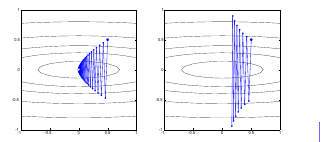
$$
\begin{aligned}
\text{Trajectories for } \alpha = 0.039 & (\text{left}) \text{ and } \alpha = 0.041 (\text{right}).
\end{aligned}
$$

### Key Insights

This example has illustrated several points:
1. The learning rate is limited by the largest eigenvalue (second derivative) of the Hessian matrix.
2. The algorithm tends to converge most quickly in the direction of the eigenvector corresponding to this largest eigenvalue, but we don’t want to overshoot the minimum point by too far in that direction.
3. The algorithm will tend to converge most slowly in the direction of the eigenvector that corresponds to the smallest eigenvalue.
4. In the end, it is the smallest eigenvalue, in combination with the learning rate, that determines how quickly the algorithm will converge. When there is a great difference in magnitude between the largest and smallest eigenvalues, the steepest descent algorithm will converge slowly.



In [6]:
# Define the quadratic function F(x) = (1/2) * x^T A x + d^T x + c
def quadratic_function(x1, x2, A, d, c):
    # F(x) = (1/2) * x^T A x + d^T x + c
    f = 0.5 * (A[0][0] * x1**2 + A[1][1] * x2**2) + d[0] * x1 + d[1] * x2 + c
    return f

# Define the gradient of F(x): g(x) = Ax + d
def gradient(x1, x2, A, d):
    g1 = A[0][0] * x1 + d[0]
    g2 = A[1][1] * x2 + d[1]
    return g1, g2

# Steepest descent algorithm implementation
def steepest_descent(A, d, c, x_init, alpha, tol=1e-6, max_iters=1000):
    x1, x2 = x_init  # Initial guess
    for i in range(max_iters):
        # Compute the gradient
        g1, g2 = gradient(x1, x2, A, d)
        
        # Update x based on the steepest descent rule
        x1_new = x1 - alpha * g1
        x2_new = x2 - alpha * g2
        
        # Check for convergence (if the change in x is smaller than tolerance)
        if abs(x1_new - x1) < tol and abs(x2_new - x2) < tol:
            print(f"Converged after {i} iterations.")
            break
        
        # Update x for the next iteration
        x1, x2 = x1_new, x2_new
        
    return x1, x2

# Parameters for the quadratic function
A = [[2, 0], [0, 50]]  # Hessian matrix
d = [-1, -1]  # Vector d
c = 0  # Constant
x_init = [0.5, 0.5]  # Initial guess
alpha = 0.039  # Learning rate

# Perform steepest descent optimization
x_opt = steepest_descent(A, d, c, x_init, alpha)

# Print the optimized solution
print(f"Optimized solution: x1 = {x_opt[0]:.6f}, x2 = {x_opt[1]:.6f}")


Converged after 269 iterations.
Optimized solution: x1 = 0.500000, x2 = 0.020000


In [7]:
# Steepest Descent Implementation without NumPy

# Function to multiply matrix and vector
def mat_vec_mul(A, x):
    result = [0] * len(A)
    for i in range(len(A)):
        result[i] = sum(A[i][j] * x[j] for j in range(len(x)))
    return result

# Function to subtract two vectors
def vec_sub(x1, x2):
    return [x1[i] - x2[i] for i in range(len(x1))]

# Function to scale a vector
def vec_scale(v, scalar):
    return [scalar * vi for vi in v]

# Function to compute dot product of two vectors
def dot_product(v1, v2):
    return sum(v1[i] * v2[i] for i in range(len(v1)))

# Function to compute the quadratic cost function F(x) = 0.5 * x^T A x + d^T x + c
def cost_function(x, A, d, c):
    term1 = 0.5 * dot_product(x, mat_vec_mul(A, x))
    term2 = dot_product(d, x)
    return term1 + term2 + c

# Function to compute the gradient ∇F(x) = A * x + d
def gradient(x, A, d):
    return vec_sub(mat_vec_mul(A, x), d)

# Steepest Descent Algorithm
def steepest_descent(A, d, c, x0, alpha, max_iter):
    x = x0
    for i in range(max_iter):
        grad = gradient(x, A, d)
        x = vec_sub(x, vec_scale(grad, alpha))
        cost = cost_function(x, A, d, c)
        print(f"Iteration {i+1}: x = {x}, Cost = {cost}")

    return x

# Example Quadratic Function Setup
A = [[2, 0], [0, 50]]  # Hessian matrix
d = [0, 0]             # Linear term in the quadratic function
c = 0                  # Constant term in the quadratic function
x0 = [0.5, 0.5]        # Initial guess
alpha = 0.01           # Learning rate
max_iter = 10          # Maximum number of iterations

# Running the steepest descent algorithm
x_min = steepest_descent(A, d, c, x0, alpha, max_iter)
print("Minimum point:", x_min)


Iteration 1: x = [0.49, 0.25], Cost = 1.8026
Iteration 2: x = [0.4802, 0.125], Cost = 0.62121704
Iteration 3: x = [0.470596, 0.0625], Cost = 0.31911684521600003
Iteration 4: x = [0.46118408, 0.03125], Cost = 0.2371048181454464
Iteration 5: x = [0.4519603984, 0.015625], Cost = 0.21037171734688673
Iteration 6: x = [0.442921190432, 0.0078125], Cost = 0.19770505983995001
Iteration 7: x = [0.43406276662336, 0.00390625], Cost = 0.188791955095288
Iteration 8: x = [0.4253815112908928, 0.001953125], Cost = 0.18104479757976458
Iteration 9: x = [0.41687388106507495, 0.0009765625], Cost = 0.17380767457216842
Iteration 10: x = [0.40853640344377345, 0.00048828125], Cost = 0.16690795340325118
Minimum point: [0.40853640344377345, 0.00048828125]


Iteration 1: x = [0.49, 0.25], Cost = 1.8026
Iteration 2: x = [0.4802, 0.125], Cost = 0.62121704
Iteration 3: x = [0.470596, 0.0625], Cost = 0.31911684521600003
Iteration 4: x = [0.46118408, 0.03125], Cost = 0.2371048181454464
Iteration 5: x = [0.4519603984, 0.015625], Cost = 0.21037171734688673
Iteration 6: x = [0.442921190432, 0.0078125], Cost = 0.19770505983995001
Iteration 7: x = [0.43406276662336, 0.00390625], Cost = 0.188791955095288
Iteration 8: x = [0.4253815112908928, 0.001953125], Cost = 0.18104479757976458
Iteration 9: x = [0.41687388106507495, 0.0009765625], Cost = 0.17380767457216842
Iteration 10: x = [0.40853640344377345, 0.00048828125], Cost = 0.16690795340325118
Iteration 11: x = [0.400365675374898, 0.000244140625], Cost = 0.16029416413451758
Iteration 12: x = [0.39235836186740003, 0.0001220703125], Cost = 0.15394545665629947
Iteration 13: x = [0.384511194630052, 6.103515625e-05], Cost = 0.1478489519280872
Iteration 14: x = [0.37682097073745097, 3.0517578125e-05], Cost 

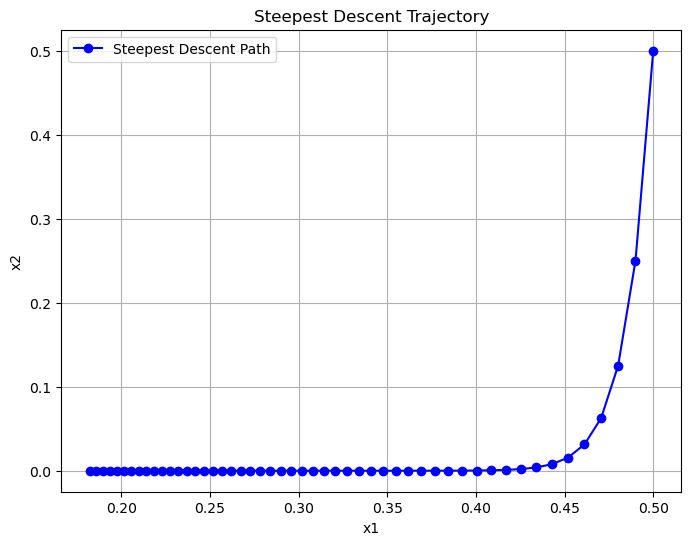

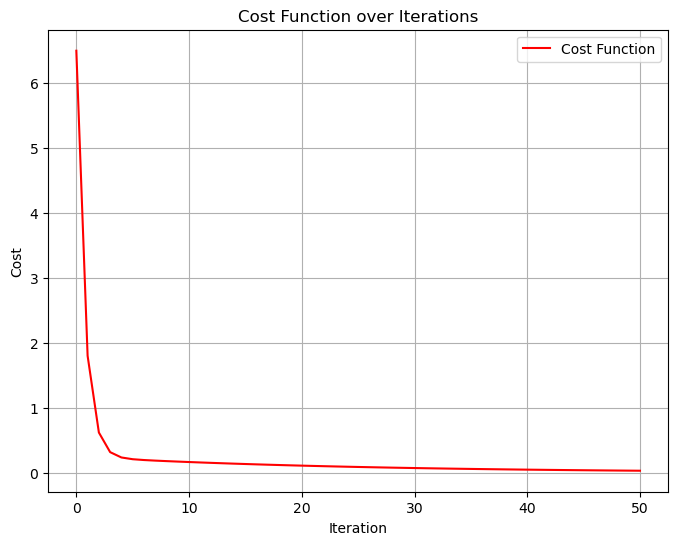

In [8]:
import matplotlib.pyplot as plt

# Steepest Descent Implementation without NumPy

# Function to multiply matrix and vector
def mat_vec_mul(A, x):
    result = [0] * len(A)
    for i in range(len(A)):
        result[i] = sum(A[i][j] * x[j] for j in range(len(x)))
    return result

# Function to subtract two vectors
def vec_sub(x1, x2):
    return [x1[i] - x2[i] for i in range(len(x1))]

# Function to scale a vector
def vec_scale(v, scalar):
    return [scalar * vi for vi in v]

# Function to compute dot product of two vectors
def dot_product(v1, v2):
    return sum(v1[i] * v2[i] for i in range(len(v1)))

# Function to compute the quadratic cost function F(x) = 0.5 * x^T A x + d^T x + c
def cost_function(x, A, d, c):
    term1 = 0.5 * dot_product(x, mat_vec_mul(A, x))
    term2 = dot_product(d, x)
    return term1 + term2 + c

# Function to compute the gradient ∇F(x) = A * x + d
def gradient(x, A, d):
    return vec_sub(mat_vec_mul(A, x), d)

# Steepest Descent Algorithm
def steepest_descent(A, d, c, x0, alpha, max_iter):
    x = x0
    trajectory = [x0]  # To store trajectory for plotting
    costs = [cost_function(x, A, d, c)]  # To store costs at each step

    for i in range(max_iter):
        grad = gradient(x, A, d)
        x = vec_sub(x, vec_scale(grad, alpha))
        cost = cost_function(x, A, d, c)
        trajectory.append(x)  # Append new point to the trajectory
        costs.append(cost)
        print(f"Iteration {i+1}: x = {x}, Cost = {cost}")

    return trajectory, costs

# Example Quadratic Function Setup
A = [[2, 0], [0, 50]]  # Hessian matrix
d = [0, 0]             # Linear term in the quadratic function
c = 0                  # Constant term in the quadratic function
x0 = [0.5, 0.5]        # Initial guess
alpha = 0.01           # Learning rate
max_iter = 50          # Maximum number of iterations

# Running the steepest descent algorithm
trajectory, costs = steepest_descent(A, d, c, x0, alpha, max_iter)

# Separating the trajectory into x1 and x2 for plotting
x1_vals = [x[0] for x in trajectory]
x2_vals = [x[1] for x in trajectory]

# Plotting the trajectory of steepest descent
plt.figure(figsize=(8, 6))
plt.plot(x1_vals, x2_vals, 'bo-', label='Steepest Descent Path')
plt.title('Steepest Descent Trajectory')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.legend()

# Plotting the cost function values over iterations
plt.figure(figsize=(8, 6))
plt.plot(range(len(costs)), costs, 'r-', label='Cost Function')
plt.title('Cost Function over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid(True)
plt.legend()

plt.show()


## Minimizing Along a Line

Another approach for selecting the learning rate is to minimize the performance index with respect to $ \alpha_k $ at each iteration. In other words, choose $ \alpha_k $ to minimize 

$$
F(x_k + \alpha_k p_k) 
$$

To do this for arbitrary functions requires a line search, which we will discuss in Chapter 12. For quadratic functions, it is possible to perform the minimization analytically. 

The derivative of Eq. (9.29) with respect to $ \alpha_k $ for quadratic $ F(x) $, can be shown to be:

$$
\frac{d}{d \alpha_k} F(x_k + \alpha_k p_k) = \nabla F(x_k)^T p_k + \alpha_k p_k^T \nabla^2 F(x_k) p_k 
$$

Setting this derivative equal to zero and solving for $ \alpha_k $, we obtain:

$$
\alpha_k = -\frac{\nabla F(x_k)^T p_k}{p_k^T \nabla^2 F(x_k) p_k} = -\frac{g_k^T p_k}{p_k^T A_k p_k}
$$

where $ A_k $ is the Hessian matrix evaluated at the old guess $ x_k $:

$$
A_k \equiv \nabla^2 F(x) |_{x = x_k} 
$$

(For quadratic functions, the Hessian matrix is not a function of $ k $.)

Let’s apply steepest descent with line minimization to the following quadratic function:

$$
F(x) = \frac{1}{2} x^T \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix} x 
$$

starting from the initial guess:

$$
x_0 = \begin{bmatrix} 0.8 \\ -0.25 \end{bmatrix} 
$$

The gradient of this function is:

$$
\nabla F(x) = \begin{bmatrix} 2x_1 + x_2 \\ x_1 + 2x_2 \end{bmatrix} 
$$

The search direction for steepest descent is the negative of the gradient. For the first iteration, this will be:

$$
p_0 = -g_0 = -\nabla F(x) = \begin{bmatrix} -1.35 \\ -0.3 \end{bmatrix} 
$$

From Eq. (9.31), the learning rate for the first iteration will be:

$$
\alpha_0 = -\frac{(-1.35)^T \begin{bmatrix} -1.35 \\ -0.3 \end{bmatrix}}{\begin{bmatrix} -1.35 \\ -0.3 \end{bmatrix}^T \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix} \begin{bmatrix} -1.35 \\ -0.3 \end{bmatrix}} = 0.413 
$$

The first step of steepest descent will then produce:

$$
x_1 = x_0 - \alpha_0 g_0 = \begin{bmatrix} 0.8 \\ -0.25 \end{bmatrix} - 0.413 \begin{bmatrix} 1.35 \\ 0.3 \end{bmatrix} = \begin{bmatrix} 0.24 \\ -0.37 \end{bmatrix} 
$$

The first five iterations of the algorithm are illustrated in **Figure.4**. 

Note that the successive steps of the algorithm are orthogonal. This happens because, when we minimize along a line, we will always stop at a point that is tangent to a contour line. Since the gradient is orthogonal to the contour line, the next step, which is along the negative of the gradient, will be orthogonal to the previous step.

We can show this analytically by using the chain rule on Eq. (9.30):

$$
\frac{d}{d \alpha_k} F(x_k + \alpha_k p_k) = \nabla F(x_k + 1)^T p_k = g_{k+1}^T p_k 
$$

Therefore, at the minimum point where this derivative is zero, the gradient is orthogonal to the previous search direction. Since the next search direction is the negative of this gradient, the consecutive search directions must be orthogonal.

$\textbf{Contour Plot}$

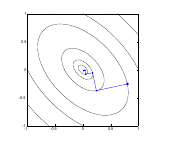


Figure.4 Steepest Descent with Minimization Along a Line





Iteration 0: x = [0.8, -0.25]
Iteration 1: x = [0.2429611650485437, -0.3737864077669903]
Iteration 2: x = [0.17183016954064628, -0.05369692798145198]
Iteration 3: x = [0.05218507272760527, -0.08028472727323886]
Iteration 4: x = [0.03690700895545906, -0.011533440298580958]
Iteration 5: x = [0.011208712367844213, -0.017244172873606477]


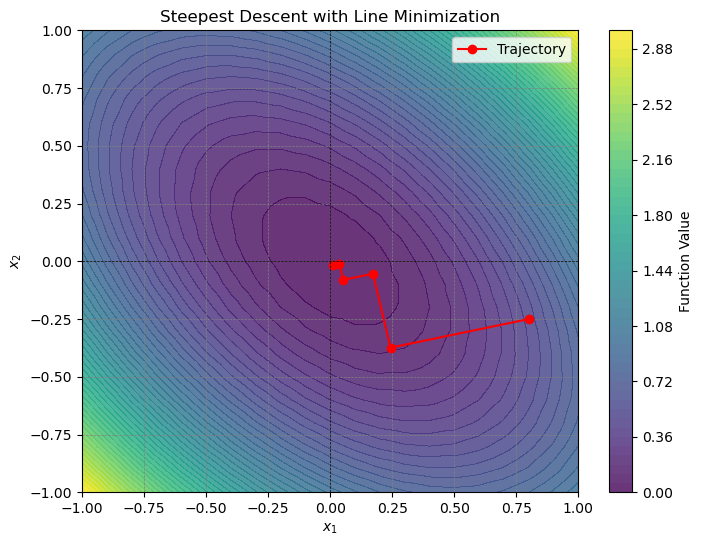

In [9]:
import matplotlib.pyplot as plt

# Define the quadratic function
def f(x):
    A = [[2, 1], [1, 2]]
    return 0.5 * (x[0]**2 * A[0][0] + x[0] * x[1] * A[0][1] + x[1] * x[0] * A[1][0] + x[1]**2 * A[1][1])

# Define the gradient of the function
def grad_f(x):
    return [2 * x[0] + x[1], x[0] + 2 * x[1]]

# Define the Hessian of the function
def hessian(x):
    return [[2, 1], [1, 2]]

# Steepest descent method with line minimization
def steepest_descent_line_minimization(x0, iterations):
    x = x0
    trajectory = [x.copy()]
    
    for _ in range(iterations):
        g = grad_f(x)
        A = hessian(x)
        
        # Calculate search direction
        p = [-g[0], -g[1]]
        
        # Compute the Hessian product with p
        hessian_p = [A[0][0] * p[0] + A[0][1] * p[1], A[1][0] * p[0] + A[1][1] * p[1]]
        
        # Calculate alpha (learning rate)
        alpha = - (g[0] * p[0] + g[1] * p[1]) / (hessian_p[0] * p[0] + hessian_p[1] * p[1])
        
        # Update the position
        x = [x[0] + alpha * p[0], x[1] + alpha * p[1]]
        trajectory.append(x.copy())
    
    return trajectory

# Initial guess
x0 = [0.8, -0.25]
iterations = 5

# Run steepest descent
trajectory = steepest_descent_line_minimization(x0, iterations)

# Print the trajectory
for i, point in enumerate(trajectory):
    print(f"Iteration {i}: x = {point}")

# Plot the contour of the quadratic function and the trajectory
x_vals = [point[0] for point in trajectory]
y_vals = [point[1] for point in trajectory]

# Create a grid for the contour plot
x_range = [-1, 1]
y_range = [-1, 1]
X = []
Y = []
Z = []

# Create grid points
step = 0.1
for i in range(int((x_range[1] - x_range[0]) / step) + 1):
    for j in range(int((y_range[1] - y_range[0]) / step) + 1):
        x = x_range[0] + i * step
        y = y_range[0] + j * step
        X.append(x)
        Y.append(y)
        Z.append(f([x, y]))

# Plotting
plt.figure(figsize=(8, 6))
plt.tricontourf(X, Y, Z, levels=50, cmap='viridis', alpha=0.8)
plt.colorbar(label='Function Value')
plt.plot(x_vals, y_vals, marker='o', color='red', label='Trajectory')
plt.title('Steepest Descent with Line Minimization')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()


## Newton's Method

The derivation of the steepest descent algorithm was based on the first-order Taylor series expansion. Newton's method is based on the second-order Taylor series:

$$
F(x_{k+1}) \approx F(x_k + \Delta x_k) \approx F(x_k) + g_k \Delta x_k + \frac{1}{2} \Delta x_k A_k \Delta x_k. \tag{9.40}
$$

The principle behind Newton's method is to locate the stationary point of this quadratic approximation to $ F(x) $. If we use the gradient of this quadratic function with respect to $ \Delta x_k $ and set it equal to zero, we find:

$$
g_k + A_k \Delta x_k = 0. \tag{9.41}
$$

Solving for \( \Delta x_k \) produces:

$$
\Delta x_k = - A_k^{-1} g_k. \tag{9.42}
$$

Thus, Newton's method is defined as:

$$
x_{k+1} = x_k - A_k^{-1} g_k. \tag{9.43}
$$

## Example Application of Newton's Method

To illustrate the operation of Newton's method, let's apply it to the quadratic function:

$$
F(x) = x_1^2 + 25 x_2^2. \tag{9.44}
$$

The gradient and Hessian matrices are given by:

$$
\nabla F(x) = \begin{bmatrix} 2x_1 \\ 50x_2 \end{bmatrix}, \quad A(x) = \begin{bmatrix} 2 & 0 \\ 0 & 50 \end{bmatrix}. \tag{9.45}
$$

Starting from the initial guess:

$$
x_0 = \begin{bmatrix} 0.5 \\ 0.5 \end{bmatrix}, \tag{9.46}
$$

the first step of Newton's method would be:

$$
x_1 = x_0 - A^{-1} g_0 = \begin{bmatrix} 0.5 \\ 0.5 \end{bmatrix} - \begin{bmatrix} 2 & 0 \\ 0 & 50 \end{bmatrix}^{-1} \begin{bmatrix} 1 \\ 25 \end{bmatrix} = \begin{bmatrix} 0.5 \\ 0.5 \end{bmatrix} - \begin{bmatrix} 0.25 \\ 0.01 \end{bmatrix} = \begin{bmatrix} 0.25 \\ 0.49 \end{bmatrix}. \tag{9.47}
$$

This method will always find the minimum of a quadratic function in one step, as it is designed to approximate the function as quadratic and locate the stationary point of this approximation.

## Non-Quadratic Functions

If the function $ F(x) $ is not quadratic, then Newton's method may not converge in one step. For example, consider the function:

$$
F(x) = (x_2 - x_1^2)^2 + 8 x_1 x_2 - x_1 + x_2 + 3. \tag{9.48}
$$

This function has three stationary points:

1. $ x_1 = -0.41878 $
2. $ x_2 = -0.134797 $
3. $ x_3 = 0.55358 $

The first point is a strong local minimum, the second is a saddle point, and the third is a strong global minimum. If we apply Newton's method starting from the initial guess $ x_0 = \begin{bmatrix} 1.5 \\ 0 \end{bmatrix} $, the first iteration will move us towards the global minimum.

Newton's method converges quickly in many applications because analytic functions can be accurately approximated by quadratic functions in a small neighborhood of a strong minimum. As we get closer to the minimum point, Newton's method will more accurately predict its location.

## Conclusion

In summary, Newton's method offers a powerful technique for optimization, particularly when dealing with functions that can be well-approximated as quadratic in the vicinity of their minima.


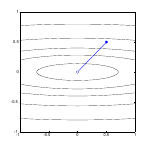

Figure.5 Trajectory for Newtons Method

# Newton's Method: Further Analysis

In Figure 9.6, we see one iteration of Newton's method starting from the initial guess:

$$
x_0 = \begin{bmatrix} 1.5 \\ 0 \end{bmatrix}. 
$$

In this case, we are converging to the local minimum. Clearly, Newton's method cannot distinguish between a local minimum and a global minimum, as it approximates the function as a quadratic, which can have only one minimum.

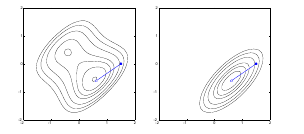
Figure.6 One Iteration of Newtons Method from x 0 = 1.5 0


Similarly, in Figure 9.7, we observe one iteration of Newton's method starting from the initial guess:

$$
x_0 = \begin{bmatrix} -1.5 \\ 0 \end{bmatrix}. 
$$

Here, we are converging toward a local minimum. 
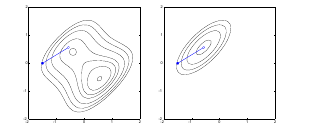
Figure.7 One Iteration of Newtons Method from x 0 = – 1.5 0


Next, in Figure 9.8, we see one iteration of Newton's method starting from the initial guess:

$$
x_0 = \begin{bmatrix} 0.75 \\ 0.75 \end{bmatrix}. 
$$

In this case, we are converging toward a saddle point of the function. It is important to note that Newton's method locates the stationary point of the quadratic approximation at the current guess and does not distinguish between minima, maxima, and saddle points.

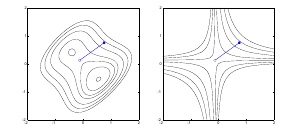

Figure.8 One Iteration of Newtons Method from x 0 = 0.75 0.75

In each of the previous cases, the stationary point of the quadratic approximation has been close to a corresponding stationary point of \( F(x) \). However, this is not always the case. In Figure 9.9, we see one iteration of Newton's method from the initial guess:

$$
x_0 = \begin{bmatrix} 1.15 \\ 0.75 \end{bmatrix}. 
$$

In this case, the quadratic approximation predicts a saddle point, although it is located very close to the local minimum of $ F(x) $. If we continue the iterations, the algorithm will converge to the local minimum, despite the initial guess being farther from the local minimum than in the previous case.

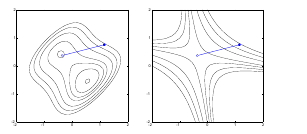
Figure.9 One Iteration of Newtons Method from x 0 = 1.15 0.75

## Summary of Properties of Newton's Method

To experiment with Newton's method and steepest descent on this function, utilize the Neural Network Design Demonstrations: **Newton's Method (nnd9nm)** and **Steepest Descent (nnd9sd)**.

While Newton's method generally produces faster convergence than steepest descent, its behavior can be complex. In addition to the potential issue of converging to saddle points (which is rare with steepest descent), Newton's method may oscillate or diverge.

### Key Observations:

- **Convergence Guarantee**: Steepest descent is guaranteed to converge if the learning rate is not too large or if linear minimization is performed at each stage.
- **Complex Behavior**: Newton's method can oscillate or diverge due to its reliance on the second derivative (Hessian matrix).
- **Hessian Requirement**: Newton's method requires computation and storage of the Hessian matrix and its inverse.
  
By comparing the update rules for steepest descent and Newton's method, we find that their search directions are identical when:

$$
A_k^{-1} = A_k = I. \tag{9.50}
$$

This observation has led to a class of optimization algorithms known as **quasi-Newton** or **one-step secant methods**. These methods replace $ A_k $ with a positive definite matrix $ H_k $, which is updated at each iteration without requiring matrix inversion. Typically, these algorithms are designed so that for quadratic functions, $ H_k $ converges to $ A $ (the Hessian is constant for quadratic functions).

For further reading on these methods, see references like [Gill81], [Scal85], or [Batt92].









Converged in 2 iterations.
Optimal x: [0. 0.]
Function value at optimal x: 0.0


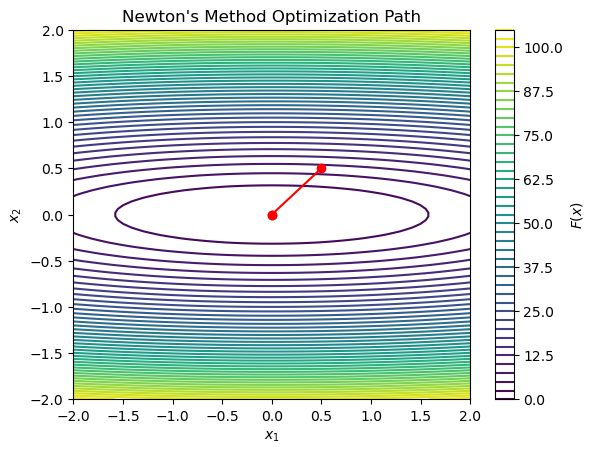

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def F(x):
    return x[0]**2 + 25 * x[1]**2

# Define the gradient of the function
def grad_F(x):
    return np.array([2 * x[0], 50 * x[1]])

# Define the Hessian matrix of the function
def hessian_F(x):
    return np.array([[2, 0],
                     [0, 50]])

# Newton's Method implementation
def newtons_method(x0, tol=1e-6, max_iter=100):
    x = x0
    history = [x]
    
    for i in range(max_iter):
        g = grad_F(x)
        H = hessian_F(x)
        
        # Check if the Hessian is invertible
        if np.linalg.det(H) == 0:
            print("Hessian is not invertible. Stopping iteration.")
            break
            
        # Update step
        delta_x = np.linalg.solve(H, -g)  # solve H * delta_x = -g
        x = x + delta_x
        
        # Store the history of x values
        history.append(x)
        
        # Check for convergence
        if np.linalg.norm(delta_x) < tol:
            print(f"Converged in {i+1} iterations.")
            break

    return x, history

# Initial guess
x0 = np.array([0.5, 0.5])

# Perform optimization
optimal_x, history = newtons_method(x0)

print("Optimal x:", optimal_x)
print("Function value at optimal x:", F(optimal_x))

# Plotting the optimization path
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = F(np.array([X, Y]))

plt.contour(X, Y, Z, levels=50)
history = np.array(history)

# Plot the path of the optimization
plt.plot(history[:, 0], history[:, 1], 'ro-')  # Red dots for each step
plt.title("Newton's Method Optimization Path")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.colorbar(label='$F(x)$')
plt.show()


Converged in 2 iterations.
Optimal x: [0.0, 0.0]
Function value at optimal x: 0.0


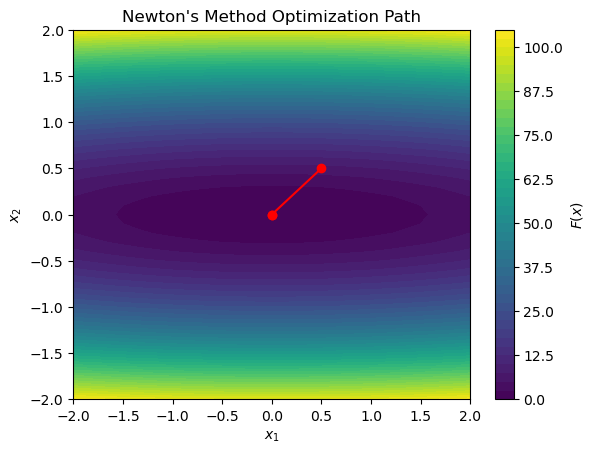

In [11]:
import math
import matplotlib.pyplot as plt

# Define the function
def F(x):
    return x[0]**2 + 25 * x[1]**2

# Define the gradient of the function
def grad_F(x):
    return [2 * x[0], 50 * x[1]]

# Define the Hessian matrix of the function
def hessian_F(x):
    return [[2, 0],
            [0, 50]]

# Function to calculate the inverse of a 2x2 matrix
def inverse_2x2(matrix):
    det = matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]
    if det == 0:
        raise ValueError("Matrix is not invertible")
    return [[matrix[1][1] / det, -matrix[0][1] / det],
            [-matrix[1][0] / det, matrix[0][0] / det]]

# Function to multiply a 2x2 matrix with a vector
def matrix_vector_multiply(matrix, vector):
    return [matrix[0][0] * vector[0] + matrix[0][1] * vector[1],
            matrix[1][0] * vector[0] + matrix[1][1] * vector[1]]

# Newton's Method implementation
def newtons_method(x0, tol=1e-6, max_iter=100):
    x = x0[:]
    history = [x[:]]  # Store the initial guess
    
    for i in range(max_iter):
        g = grad_F(x)
        H = hessian_F(x)
        
        # Invert the Hessian
        H_inv = inverse_2x2(H)
        
        # Update step: delta_x = -H_inv * g
        delta_x = matrix_vector_multiply(H_inv, [-g[0], -g[1]])
        
        # Update x
        x[0] += delta_x[0]
        x[1] += delta_x[1]
        
        # Store the history of x values
        history.append(x[:])
        
        # Check for convergence
        if math.sqrt(delta_x[0]**2 + delta_x[1]**2) < tol:
            print(f"Converged in {i+1} iterations.")
            break

    return x, history

# Initial guess
x0 = [0.5, 0.5]

# Perform optimization
optimal_x, history = newtons_method(x0)

print("Optimal x:", optimal_x)
print("Function value at optimal x:", F(optimal_x))

# Plotting the optimization path
x_vals = [i * 0.1 for i in range(-20, 21)]  # From -2 to 2
y_vals = [i * 0.1 for i in range(-20, 21)]
X, Y = [], []

for x in x_vals:
    for y in y_vals:
        X.append(x)
        Y.append(y)

Z = [F([x, y]) for x, y in zip(X, Y)]

# Create contour plot
plt.tricontourf(X, Y, Z, levels=50)
history = [list(h) for h in history]

# Plot the path of the optimization
history_x = [h[0] for h in history]
history_y = [h[1] for h in history]
plt.plot(history_x, history_y, 'ro-')  # Red dots for each step
plt.title("Newton's Method Optimization Path")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.colorbar(label='$F(x)$')
plt.show()


## Conjugate Gradient Method

Newton’s method has a property called **quadratic termination**, which means that it minimizes a quadratic function exactly in a finite number of iterations. Unfortunately, it requires the calculation and storage of the second derivatives. When the number of parameters, $ n $, is large, it may be impractical to compute all of the second derivatives. (Note that the gradient has $ 2n $ elements, while the Hessian has $ n $ elements.) This is especially true with neural networks, where practical applications can require several hundred to many thousand weights. 

For these cases, we would like to have methods that require only first derivatives but still have quadratic termination.

Recall the performance of the steepest descent algorithm, with linear searches at each iteration. The search directions at consecutive iterations were orthogonal (see Figure.4). For quadratic functions with elliptical contours, this produces a zig-zag trajectory of short steps. 

### Conjugate Directions

One possibility is **conjugate directions**. Suppose that we wish to locate the minimum of the following quadratic function:

$$
F(x) = \frac{1}{2} x^T A x + d^T x + c
$$

A set of vectors $ \{ p_k \} $ is mutually conjugate with respect to a positive definite Hessian matrix $ A $ if and only if 

$$
p_k^T A p_j = 0, \quad k \neq j
$$

As with orthogonal vectors, there are an infinite number of mutually conjugate sets of vectors that span a given $ n $-dimensional space. One set of conjugate vectors consists of the eigenvectors of $ A $. 

Let $ \{ \lambda_1, \lambda_2, \ldots, \lambda_n \} $ and $ \{ z_1, z_2, \ldots, z_n \} $ be the eigenvalues and eigenvectors of the Hessian matrix. To see that the eigenvectors are conjugate, replace $ p_k $ with $ z_k $ in the equation:

$$
z_k^T A z_j = \lambda_j z_k^T z_j = 0, \quad k \neq j,
$$

where the last equality holds because the eigenvectors of a symmetric matrix are mutually orthogonal. 

It is not surprising that we can minimize a quadratic function exactly by searching along the eigenvectors of the Hessian matrix, since they form the principal axes of the function contours.

### Constructing Conjugate Directions

Unfortunately, this is not of much practical help since, to find the eigenvectors, we must first find the Hessian matrix. We want to find an algorithm that does not require the computation of second derivatives. 

It can be shown that if we make a sequence of exact linear searches along any set of conjugate directions $ \{ p_1, p_2, \ldots, p_n \} $, then the exact minimum of any quadratic function, with $ n $ parameters, will be reached in at most $ n $ searches.

The question is, **How can we construct these conjugate search directions?**

First, we want to restate the conjugacy condition without the use of the Hessian matrix. Recall that for quadratic functions:

$$
\nabla F(x) = Ax + d,
$$
$$
\nabla^2 F(x) = A.
$$

By combining these equations, we find that the change in the gradient at iteration $ k + 1 $ is 

$$
\Delta g_k = g_{k+1} - g_k = (Ax_{k+1} + d) - (Ax_k + d) = A \Delta x_k,
$$

where, from the previous equations, we have 

$$
\Delta x_k = (x_{k+1} - x_k) = \alpha_k p_k,
$$

and $ \alpha_k $ is chosen to minimize $ F(x) $ in the direction $ p_k $.

We can now restate the conjugacy conditions as:

$$
\Delta g_k^T p_j = 0, \quad k \neq j.
$$

Note that we no longer need to know the Hessian matrix. We have restated the conjugacy conditions in terms of the changes in the gradient at successive iterations of the algorithm. The search directions will be conjugate if they are orthogonal to the changes in the gradient.

### Initial Search Direction

Note that the first search direction, $ p_0 $, is arbitrary, and $ p_1 $ can be any vector that is orthogonal to $ \Delta g_0 $. Therefore, there are an infinite number of sets of conjugate vectors. 

It is common to begin the search in the steepest descent direction:

$$
p_0 = -g_0.
$$

Then, at each iteration, we need to construct a vector $ p_k $ that is orthogonal to $ \{ \Delta g_0, \Delta g_1, \ldots, \Delta g_{k-1} \} $. This is a procedure similar to Gram-Schmidt orthogonalization. 

It can be simplified to iterations of the form:

$$
p_k = -g_k + \beta_k p_{k-1}.
$$

The scalars $ \beta_k $ can be chosen by several different methods, which produce equivalent results for quadratic functions. The most common choices are:

$$
\beta_k = \frac{\Delta g_{k-1}^T g_k}{\Delta g_{k-1}^T p_{k-1}} \quad \text{(Hestenes and Stiefel)}
$$

or

$$
\beta_k = \frac{g_k^T g_k}{g_{k-1}^T g_{k-1}}.
$$


### Fletcher-Reeves and Polak-Ribiére Methods

Due to Fletcher and Reeves, we can define \( \beta_k \) as follows:

$$
\beta_k = \frac{\Delta g_{k-1}^T g_k}{\Delta g_{k-1}^T p_{k-1}} \quad \text{(Fletcher-Reeves)}
$$

And due to Polak and Ribiére:

$$
\beta_k = \frac{g_k^T g_k - g_{k-1}^T g_{k-1}}{g_{k-1}^T g_{k-1}} \quad \text{(Polak-Ribiére)}
$$

### Summary of the Conjugate Gradient Method

To summarize our discussion, the conjugate gradient method consists of the following steps:

1. **Select the first search direction** to be the negative of the gradient:
   $$
   p_0 = -g_0.
   $$

2. **Take a step** according to
   $$
   x_{k+1} = x_k + \alpha_k p_k,
   $$
   selecting the learning rate \( \alpha_k \) to minimize the function along the search direction. We will discuss general linear minimization techniques in Chapter 12. For quadratic functions, we can use
   $$
   \alpha_k = -\frac{g_k^T p_k}{p_k^T A p_k}.
   $$

3. **Select the next search direction** according to
   $$
   p_k = -g_k + \beta_k p_{k-1},
   $$
   using Eq. (9.61), Eq. (9.62), or Eq. (9.63) to calculate \( \beta_k \).

4. **If the algorithm has not converged**, return to step 2.

### Example: Performance of the Algorithm

To illustrate the performance of the algorithm, consider the example function:

$$
F(x) = \frac{1}{2} x_1^2 + \frac{1}{2} x_2^2 + x_1 + 2x_2.
$$

With initial guess 

$$
x_0 = 
\begin{bmatrix}
0.8 \\
-0.25
\end{bmatrix}.
$$

The gradient of this function is 

$$
\nabla F(x) = 
\begin{bmatrix}
2x_1 + x_2 \\
x_1 + 2x_2
\end{bmatrix}.
$$

As with steepest descent, the first search direction is the negative of the gradient:

$$
p_0 = -g_0 = -\nabla F(x_0).
$$

Calculating \( p_0 \):

$$
g_0 = 
\begin{bmatrix}
2(0.8) - 0.25 \\
0.8 + 2(-0.25)
\end{bmatrix} = 
\begin{bmatrix}
1.35 \\
0.3
\end{bmatrix},
$$

therefore,

$$
p_0 = 
\begin{bmatrix}
-1.35 \\
-0.3
\end{bmatrix}.
$$

### First Step Calculation

From Eq. (9.31), the learning rate for the first iteration will be:

$$
\alpha_0 = -\frac{g_0^T p_0}{p_0^T A p_0} = -\frac{(-1.35)(1.35) + (-0.3)(0.3)}{1} = 0.413.
$$

The first step of conjugate gradient is therefore:

$$
x_1 = x_0 + \alpha_0 p_0 = 
\begin{bmatrix}
0.8 \\
-0.25
\end{bmatrix} + 0.413 
\begin{bmatrix}
-1.35 \\
-0.3
\end{bmatrix} = 
\begin{bmatrix}
0.24 \\
-0.37
\end{bmatrix}.
$$

### Second Search Direction

Now we need to find the second search direction from Eq. (9.60). This requires the gradient at \( x_1 \):

$$
g_1 = \nabla F(x_1) = 
\begin{bmatrix}
2(0.24) - 0.37 \\
0.24 + 2(-0.37)
\end{bmatrix} = 
\begin{bmatrix}
0.11 \\
-0.5
\end{bmatrix}.
$$

We can now find \( \beta_1 \):

$$
\beta_1 = \frac{g_1^T g_1 - g_0^T g_0}{g_{0}^T g_{0}} = \frac{0.11^T 0.11 - 1.35^T 1.35}{1.9125} = 0.137.
$$

The second search direction is then computed from Eq. (9.60):

$$
p_1 = -g_1 + \beta_1 p_0 = 
\begin{bmatrix}
-0.11 \\
0.5
\end{bmatrix} + 0.137 
\begin{bmatrix}
-1.35 \\
-0.3
\end{bmatrix} = 
\begin{bmatrix}
-0.295 \\
0.459
\end{bmatrix}.
$$

### Second Step Calculation

From Eq. (9.31), the learning rate for the second iteration will be:

$$
\alpha_1 = -\frac{g_1^T p_1}{p_1^T A p_1} = 0.807.
$$

The second step of conjugate gradient is therefore:

$$
x_2 = x_1 + \alpha_1 p_1 = 
\begin{bmatrix}
0.24 \\
-0.37
\end{bmatrix} + 0.807 
\begin{bmatrix}
-0.295 \\
0.459
\end{bmatrix} = 
\begin{bmatrix}
0 \\
0
\end{bmatrix}.
$$

As predicted, the algorithm converges exactly to the minimum in two iterations (since this is a two-dimensional quadratic function). 

### Comparison with Steepest Descent

The conjugate gradient algorithm adjusts the second search direction so that it will pass through the minimum of the function (center of the function contours), instead of using an orthogonal search direction, as in steepest descent.

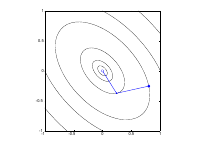

Figure.10 Conjugate Gradient Algorithm



We will return to the conjugate gradient algorithm in Chapter 12, where we will discuss how the algorithm should be adjusted for non-quadratic functions. To experiment with the conjugate gradient algorithm and compare it with steepest descent, use the Neural Network Design Demonstration Method Comparison (nnd9mc).


In [12]:
class ConjugateGradient:
    def __init__(self, A, b, x0, tol=1e-10, max_iter=1000):
        """
        Initializes the Conjugate Gradient algorithm.
        
        Parameters:
        A (list of list of floats): The Hessian matrix (must be positive definite).
        b (list of floats): The linear coefficients vector.
        x0 (list of floats): The initial guess for the parameters.
        tol (float): The tolerance for convergence.
        max_iter (int): The maximum number of iterations.
        """
        self.A = A
        self.b = b
        self.x = x0
        self.tol = tol
        self.max_iter = max_iter

    def gradient(self, x):
        """
        Computes the gradient of the quadratic function at x.
        
        Parameters:
        x (list of floats): The current parameter vector.
        
        Returns:
        list of floats: The gradient vector.
        """
        grad = [0] * len(x)
        for i in range(len(self.A)):
            for j in range(len(self.A[i])):
                grad[i] += self.A[i][j] * x[j]
            grad[i] += self.b[i]
        return grad

    def dot_product(self, v1, v2):
        """
        Computes the dot product of two vectors.
        
        Parameters:
        v1 (list of floats): The first vector.
        v2 (list of floats): The second vector.
        
        Returns:
        float: The dot product of v1 and v2.
        """
        return sum(v1[i] * v2[i] for i in range(len(v1)))

    def scalar_multiply(self, scalar, vector):
        """
        Multiplies a vector by a scalar.
        
        Parameters:
        scalar (float): The scalar multiplier.
        vector (list of floats): The vector to multiply.
        
        Returns:
        list of floats: The resulting vector.
        """
        return [scalar * x for x in vector]

    def vector_add(self, v1, v2):
        """
        Adds two vectors.
        
        Parameters:
        v1 (list of floats): The first vector.
        v2 (list of floats): The second vector.
        
        Returns:
        list of floats: The resulting vector.
        """
        return [v1[i] + v2[i] for i in range(len(v1))]

    def conjugate_gradient(self):
        """
        Performs the Conjugate Gradient optimization algorithm.
        
        Returns:
        list of floats: The optimized parameters.
        """
        r = self.gradient(self.x)  # Initial gradient
        p = self.scalar_multiply(-1, r)  # Initial search direction
        
        for k in range(self.max_iter):
            # Calculate alpha
            Ap = [0] * len(self.A)
            for i in range(len(self.A)):
                for j in range(len(self.A[i])):
                    Ap[i] += self.A[i][j] * p[j]

            alpha = self.dot_product(r, r) / self.dot_product(p, Ap)  # Step size

            # Update x
            self.x = self.vector_add(self.x, self.scalar_multiply(alpha, p))

            # Update r
            r_new = self.gradient(self.x)

            # Check for convergence
            if (sum(r_new[i] ** 2 for i in range(len(r_new))) ** 0.5) < self.tol:
                break
            
            # Update beta
            beta = self.dot_product(r_new, r_new) / self.dot_product(r, r)

            # Update p
            p = self.vector_add(self.scalar_multiply(-1, r_new), self.scalar_multiply(beta, p))

            # Update r
            r = r_new
        
        return self.x


# Example usage:
if __name__ == "__main__":
    # Define a positive definite matrix A and vector b
    A = [[2, 0], [0, 2]]  # Hessian matrix
    b = [-2, -5]          # Linear coefficients
    x0 = [0, 0]           # Initial guess

    cg = ConjugateGradient(A, b, x0)
    optimized_x = cg.conjugate_gradient()
    print("Optimized parameters:", optimized_x)


Optimized parameters: [1.0, 2.5]


Optimized parameters: [1.0, 2.5]


TypeError: 'numpy.float64' object is not iterable

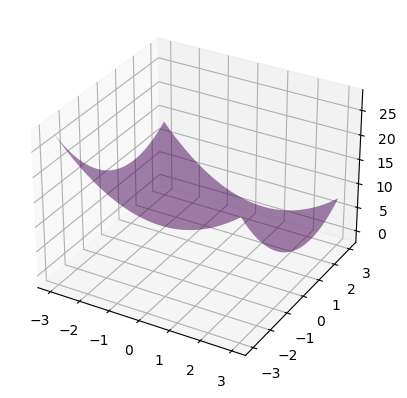

In [13]:
import matplotlib.pyplot as plt
import numpy as np

class ConjugateGradient:
    def __init__(self, A, b, x0, tol=1e-10, max_iter=1000):
        self.A = A
        self.b = b
        self.x = x0
        self.tol = tol
        self.max_iter = max_iter
        self.path = [x0]  # To store the path of optimization

    def gradient(self, x):
        grad = [0] * len(x)
        for i in range(len(self.A)):
            for j in range(len(self.A[i])):
                grad[i] += self.A[i][j] * x[j]
            grad[i] += self.b[i]
        return grad

    def dot_product(self, v1, v2):
        return sum(v1[i] * v2[i] for i in range(len(v1)))

    def scalar_multiply(self, scalar, vector):
        return [scalar * x for x in vector]

    def vector_add(self, v1, v2):
        return [v1[i] + v2[i] for i in range(len(v1))]

    def conjugate_gradient(self):
        r = self.gradient(self.x)
        p = self.scalar_multiply(-1, r)
        
        for k in range(self.max_iter):
            Ap = [0] * len(self.A)
            for i in range(len(self.A)):
                for j in range(len(self.A[i])):
                    Ap[i] += self.A[i][j] * p[j]

            alpha = self.dot_product(r, r) / self.dot_product(p, Ap)
            self.x = self.vector_add(self.x, self.scalar_multiply(alpha, p))
            self.path.append(self.x.copy())  # Store the current point

            r_new = self.gradient(self.x)

            if (sum(r_new[i] ** 2 for i in range(len(r_new))) ** 0.5) < self.tol:
                break
            
            beta = self.dot_product(r_new, r_new) / self.dot_product(r, r)
            p = self.vector_add(self.scalar_multiply(-1, r_new), self.scalar_multiply(beta, p))
            r = r_new

        return self.x

    def plot(self):
        # Create a grid for the function surface
        x_vals = np.linspace(-3, 3, 100)
        y_vals = np.linspace(-3, 3, 100)
        X, Y = np.meshgrid(x_vals, y_vals)

        # Define the quadratic function
        Z = 0.5 * (self.A[0][0] * X**2 + self.A[1][1] * Y**2 + 
                   self.b[0] * X + self.b[1] * Y)

        # Plotting the surface
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X, Y, Z, alpha=0.5, rstride=100, cstride=100, cmap='viridis')

        # Extract path for x and y values
        path = np.array(self.path)
        ax.plot(path[:, 0], path[:, 1], self.function_value(path), marker='o', color='r')

        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')
        ax.set_zlabel('Function Value')
        plt.title('Conjugate Gradient Optimization Path')
        plt.show()

    def function_value(self, points):
        """Calculate the function value for given points."""
        values = []
        for point in points:
            value = 0.5 * (self.dot_product(point, self.vector_add(self.vector_add(self.scalar_multiply(self.b[0], point), self.scalar_multiply(self.b[1], point)), self.vector_add(self.scalar_multiply(0.5, self.dot_product(point, point)), self.scalar_multiply(0.5, point[0])))))
            values.append(value)
        return values


# Example usage
if __name__ == "__main__":
    A = [[2, 0], [0, 2]]  # Hessian matrix
    b = [-2, -5]          # Linear coefficients
    x0 = [0, 0]           # Initial guess

    cg = ConjugateGradient(A, b, x0)
    optimized_x = cg.conjugate_gradient()
    print("Optimized parameters:", optimized_x)

    # Plot the optimization process
    cg.plot()


Optimized parameters: [1.0, 2.5]


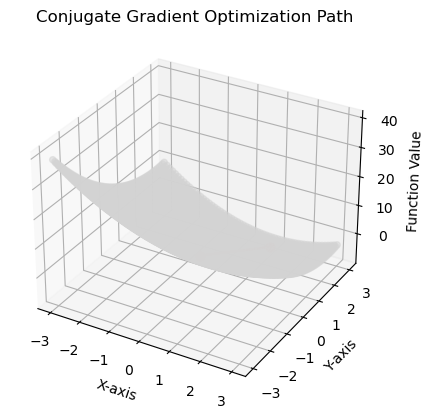

In [15]:
import matplotlib.pyplot as plt

class ConjugateGradient:
    def __init__(self, A, b, x0, tol=1e-10, max_iter=1000):
        self.A = A
        self.b = b
        self.x = x0
        self.tol = tol
        self.max_iter = max_iter
        self.path = [x0.copy()]  # Store the path of optimization

    def gradient(self, x):
        """Calculate the gradient of the quadratic function."""
        grad = [0] * len(x)
        for i in range(len(self.A)):
            for j in range(len(self.A[i])):
                grad[i] += self.A[i][j] * x[j]
            grad[i] += self.b[i]
        return grad

    def dot_product(self, v1, v2):
        """Calculate the dot product of two vectors."""
        return sum(v1[i] * v2[i] for i in range(len(v1)))

    def scalar_multiply(self, scalar, vector):
        """Multiply a vector by a scalar."""
        return [scalar * x for x in vector]

    def vector_add(self, v1, v2):
        """Add two vectors."""
        return [v1[i] + v2[i] for i in range(len(v1))]

    def function_value(self, point):
        """Calculate the value of the quadratic function at a given point."""
        Ax = [0] * len(self.A)
        for i in range(len(self.A)):
            for j in range(len(self.A[i])):
                Ax[i] += self.A[i][j] * point[j]
        return 0.5 * self.dot_product(point, Ax) + self.dot_product(self.b, point)

    def conjugate_gradient(self):
        """Perform the Conjugate Gradient optimization."""
        r = self.gradient(self.x)
        p = self.scalar_multiply(-1, r)
        
        for k in range(self.max_iter):
            Ap = [0] * len(self.A)
            for i in range(len(self.A)):
                for j in range(len(self.A[i])):
                    Ap[i] += self.A[i][j] * p[j]

            alpha = self.dot_product(r, r) / self.dot_product(p, Ap)
            self.x = self.vector_add(self.x, self.scalar_multiply(alpha, p))
            self.path.append(self.x.copy())  # Store the current point

            r_new = self.gradient(self.x)

            if (sum(r_new[i] ** 2 for i in range(len(r_new))) ** 0.5) < self.tol:
                break
            
            beta = self.dot_product(r_new, r_new) / self.dot_product(r, r)
            p = self.vector_add(self.scalar_multiply(-1, r_new), self.scalar_multiply(beta, p))
            r = r_new

        return self.x

    def plot(self):
        """Plot the function surface and the optimization path."""
        # Create a grid for the function surface
        x_vals = [i * 0.1 for i in range(-30, 31)]
        y_vals = [i * 0.1 for i in range(-30, 31)]
        X, Y, Z = [], [], []

        for x in x_vals:
            for y in y_vals:
                X.append(x)
                Y.append(y)
                # Calculate the function value
                Z.append(self.function_value([x, y]))

        # Plotting the surface
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        # Create a mesh grid for plotting
        ax.scatter(X, Y, Z, alpha=0.5, c='lightgray')

        # Extract path for x and y values
        path = self.path
        x_path = [point[0] for point in path]
        y_path = [point[1] for point in path]
        z_path = [self.function_value(point) for point in path]

        ax.plot(x_path, y_path, z_path, marker='o', color='red')

        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')
        ax.set_zlabel('Function Value')
        plt.title('Conjugate Gradient Optimization Path')
        plt.show()

# Example usage
if __name__ == "__main__":
    A = [[2, 0], [0, 2]]  # Hessian matrix
    b = [-2, -5]          # Linear coefficients
    x0 = [0, 0]           # Initial guess

    cg = ConjugateGradient(A, b, x0)
    optimized_x = cg.conjugate_gradient()
    print("Optimized parameters:", optimized_x)

    # Plot the optimization process
    cg.plot()


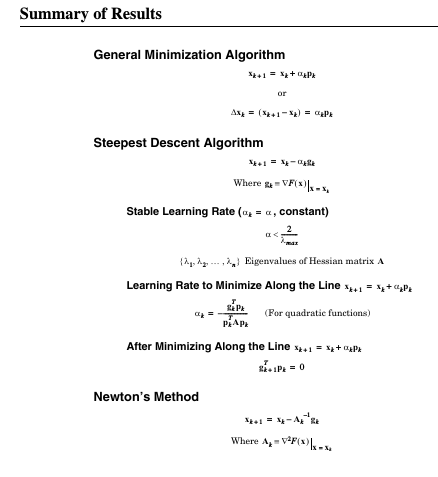

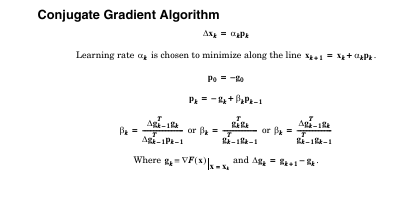